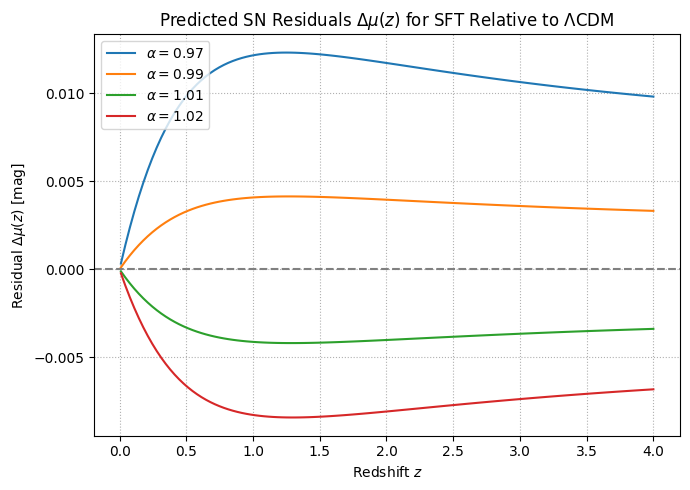

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# --- Constants (SFT baseline 2025-10) ---
Omega_m0 = 0.315
Omega_r0 = 9.034e-5
Omega_DE0 = 0.68491
H0 = 67.77e3 / 3.08568e22  # H0 = 67.77 km/s/Mpc → s^-1
c = 2.99792458e8           # m/s

# --- Define Hubble function in SFT ---
def E_SFT(z, alpha):
    a = 1.0 / (1.0 + z)
    return np.sqrt(
        Omega_m0 * (1.0 + z)**3 +
        Omega_r0 * (1.0 + z)**4 +
        Omega_DE0 * a**(3.0 * (1.0 - alpha))
    )

# --- Luminosity distance (in Mpc) ---
def dL(z, alpha):
    zarr = np.linspace(0.0, z, 400)
    Ez = E_SFT(zarr, alpha)
    integral = cumulative_trapezoid(1.0 / Ez, zarr, initial=0.0)
    # Convert to Mpc: c/H0 in meters, divide by Mpc in meters
    dL_m = (1.0 + z) * c / H0 * integral[-1]
    dL_Mpc = dL_m / 3.08568e22
    return dL_Mpc

# --- Compute Δμ(z) for various α ---
z_vals = np.linspace(0.01, 4.0, 120)  # avoid z=0 singularity
alphas = [0.97, 0.99, 1.01, 1.02]

mu_LCDM = 5 * np.log10([dL(z, 1.00) for z in z_vals]) + 25

plt.figure(figsize=(7,5))
for alpha in alphas:
    mu_SFT = 5 * np.log10([dL(z, alpha) for z in z_vals]) + 25
    dmu = mu_SFT - mu_LCDM
    plt.plot(z_vals, dmu, label=fr"$\alpha={alpha}$")

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"Residual $\Delta\mu(z)$ [mag]")
plt.title(r"Predicted SN Residuals $\Delta\mu(z)$ for SFT Relative to $\Lambda$CDM")
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()
